In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import neural_network

import tensorflow_ranking as tfr

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, Conv1D, MaxPooling1D, GRU, Softmax
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras import models, layers, utils, backend as K

In [2]:
#labels
LABELS = ['Standing',
          'Sitting',
          'Lying',
          'Squatting',
          'Walking',
          'Bending']

behavioral_labels = [
    "Bring",
    "Clean Floor",
    "Clean Surface",
    "Close Door",
    "Close Drawer",
    "Close Lid By Rotate",
    "Close Other Lid",
    "Close Small Box",
    "Close Tap Water",
    "Drink",
    "Dry Off Hands",
    "Dry Off Hands By Shake",
    "Eat Small",
    "Gargle",
    "Getting Up",
    "Hang",
    "Lying Down",
    "Open Bag",
    "Open Big Box",
    "Open Door",
    "Open Drawer",
    "Open Lid By Rotate",
    "Open Other Lid",
    "Open Small Box",
    "Open Tap Water",
    "Plug In",
    "Press by Grasp",
    "Press From Top",
    "Press Switch",
    "Put From Bottle",
    "Put From Tap Water",
    "Put High Position",
    "Put On Floor",
    "Read",
    "Rotate",
    "Rub Hands",
    "Scoop And Put",
    "Sitting Down",
    "Squatting Down",
    "Standing Up",
    "Stand Up From Squatting",
    "Take From Floor",
    "Take From High Position",
    "Take Off Jacket",
    "Take Out",
    "Talk By Telephone",
    "Throw Out",
    "Throw Out Water",
    "Touch Smartphone Screen",
    "Type",
    "Unhang",
    "Unplug",
    "Wear Jacket",
    "Write"]


labeldict = {
0 : "Bring",
1 : "Clean Floor",
2 : "Clean Surface",
4 : "Close Door",
5 : "Close Drawer",
6 : "Close Lid By Rotate",
7 : "Close Other Lid",
8 : "Close Small Box",
9 : "Close Tap Water",
10 : "Drink",
11 : "Dry Off Hands",
12 : "Dry Off Hands By Shake",
13 : "Eat Small",
14 : "Gargle",
15 : "Getting Up",
16 : "Hang",
17 : "Lying Down",
18 : "Open Bag",
19 : "Open Big Box",
20 : "Open Door",
21 : "Open Drawer",
22 : "Open Lid By Rotate",
23 : "Open Other Lid",
24 : "Open Small Box",
25 : "Open Tap Water",
26 : "Plug In",
27 : "Press by Grasp",
28 : "Press From Top",
29 : "Press Switch",
30 : "Put From Bottle",
31 : "Put From Tap Water",
32 : "Put High Position",
33 : "Put On Floor",
34 : "Read",
35 : "Rotate",
36 : "Rub Hands",
37 : "Scoop And Put",
38 : "Sitting Down",
39 : "Squatting Down",
40 : "Standing Up",
41 : "Stand Up From Squatting",
42 : "Take From Floor",
43 : "Take From High Position",
44 : "Take Off Jacket",
45 : "Take Out",
46 : "Talk By Telephone",
47 : "Throw Out",
48 : "Throw Out Water",
49 : "Touch Smartphone Screen",
50 : "Type",
51 : "Unhang",
52 : "Unplug",
53 : "Wear Jacket",
54 : "Write"
}

#load data
#training
train_acc = np.load('training/trainAccelerometer.npy')
train_gra = np.load('training/trainGravity.npy')
train_gyr = np.load('training/trainGyroscope.npy')
train_lin = np.load('training/trainLinearAcceleration.npy')

train_mag = np.load('training/trainMagnetometer800.npy')

trainJins_acc = np.load('training/trainJinsAccelerometer800.npy')
trainJins_gyr = np.load('training/trainJinsGyroscope800.npy')

trainMS_acc = np.load('training/trainMSAccelerometer800.npy')
trainMS_gyr = np.load('training/trainMSGyroscope800.npy')

train_label = np.load('training/trainLabels.npy')

#train_data = [train_acc, train_gra, train_gyr, train_lin, train_mag, trainJins_acc, trainJins_gyr, trainMS_acc, trainMS_gyr]

test_acc = np.load('testing/testAccelerometer.npy')
test_gra = np.load('testing/testGravity.npy')
test_gyr = np.load('testing/testGyroscope.npy')
test_mag = np.load('testing/testMagnetometer800.npy')
test_lin = np.load('testing/testLinearAcceleration.npy')

testJins_acc = np.load('testing/testJinsAccelerometer800.npy')
testJins_gyr = np.load('testing/testJinsGyroscope800.npy')

testMS_acc = np.load('testing/testMSAccelerometer800.npy')
testMS_gyr = np.load('testing/testMSGyroscope800.npy')

test_label = np.load('testing/testLabels.npy')

#test_data = [test_acc, test_gra, test_gyr, test_lin, test_mag, testJins_acc, testJins_gyr, testMS_acc, testMS_gyr]

In [3]:
#create input feature vector

#train vector
train_data = [train_gyr, train_mag, train_lin, trainJins_acc, trainJins_gyr, trainMS_acc, trainMS_gyr]

train_features = np.append(train_acc, train_gra, axis=2)
for i in train_data:
    train_features = np.append(train_features, i, axis=2)

print(train_features.shape)
#print(train_features)


#test vector
test_data = [ test_gyr, test_mag, test_lin, testJins_acc, testJins_gyr, testMS_acc, testMS_gyr]
test_features = np.append(test_acc, test_gra, axis =2)
for i in test_data:
    test_features = np.append(test_features, i, axis=2)

print(test_features.shape)
print(test_features.shape[0])
print(test_features.dtype)
#print(test_features[0])

(2284, 800, 27)
(2288, 800, 27)
2288
float32


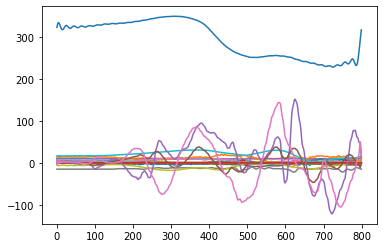

Bring


In [4]:
#print(test_label)
#print(train_features)
#all samples of first activity
n = 0
plt.plot(train_features[n])
plt.show()
print(labeldict[n])

In [5]:
#set input and output dimensions
num_time_periods, num_sensors = train_features.shape[1], train_features.shape[2]
num_classes = 55

#keras are not able to process multi-dimensional input data - data needs to be flatten - from 800x27 to 21600 values
input_shape = (num_time_periods * num_sensors)
train_features = train_features.reshape(train_features.shape[0], input_shape)

print('train_features shape:', train_features.shape)
print('input_shape:', input_shape)

test_num_time_periods, test_num_sensors = test_features.shape[1], test_features.shape[2]

#keras are not able to process multi-dimensional input data - data needs to be flatten - from 800x27 to 21600 values
test_input_shape = (test_num_time_periods * test_num_sensors)
test_features = test_features.reshape(test_features.shape[0], test_input_shape)
print('test_features shape:', test_features.shape)
print('test_input_shape:', test_input_shape)

train_features shape: (2284, 21600)
input_shape: 21600
test_features shape: (2288, 21600)
test_input_shape: 21600


In [6]:
#numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them
#done with one-hot-encoding
y_train_hot = np_utils.to_categorical(train_label, num_classes)
print('New y_train shape: ', y_train_hot.shape)

New y_train shape:  (2284, 55)


In [7]:
y_test_hot = np_utils.to_categorical(test_label, num_classes)
print('New y_train shape: ', y_test_hot.shape)

New y_train shape:  (2288, 55)


In [8]:
#Evaluation metrices that has to be used (objectives of project): accuracy, Average F1-score 
# ToDO: and Mean Average Precision (code provided on moodle)

# define metrics
def Recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def Precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def F1(y_true, y_pred):
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#taken from moodle
def computeMeanAveragePrecision(labels,softmaxEstimations):

    nbExamples , nbClasses = softmaxEstimations.shape

    averagePrecisions = np.zeros((nbClasses),dtype=np.float32)

    # For all classes
    for classIdx in range(nbClasses):

        # Sort the softmaxEstimations by decreasing order, and keep the order consistent with the labels
        permutation = list(reversed(np.argsort(softmaxEstimations[:,classIdx])))
        labelArray = np.asarray(labels)
        labelsTmp = list(labelArray[permutation])

        # Convert the labels to binary (1-vs-all)
        for idx in range(len(labelsTmp)):
            if labelsTmp[idx] == classIdx:
                labelsTmp[idx] = 1
            else:
                labelsTmp[idx] = 0

        # Compute the averaged sum of precisions by descending order
        nbPrecisionComputations = 0
        averagePrecisionSum = 0

        for idx in range(len(labelsTmp)):
            if labelsTmp[idx] == 1:
                averagePrecisionSum += np.sum(labelsTmp[:idx+1])/float(idx+1)
                nbPrecisionComputations += 1

        if nbPrecisionComputations == 0:
             averagePrecisions[classIdx] = 0
        else:
            averagePrecisions[classIdx] = averagePrecisionSum/float(nbPrecisionComputations)

    # Return global MAP and class MAPs
    return np.mean(averagePrecisions), averagePrecisions

In [70]:
#create model
#number of hidden layer: around (number of inputs + 1)/2

#(input: ?-dimensional vectors) 
#       ↧

#.
#.
#.
#       ↧
#[Dense (1? units, softmax activation)]
#       ↧
#(output: integer for human activity (0-54))

#create layers - ToDo: need to be adapted
TIME_PERIODS = 800
i = int(round((input_shape+1)/2))

model = Sequential()
model.add(Reshape((TIME_PERIODS, 27), input_shape=(input_shape,)))
model.add(Conv1D(100, 20, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(Dense(100, activation='relu'))
model.add(Flatten())
model.add(Dense(55, activation='softmax'))

model.summary()

"""
model = Sequential()
model.add(Reshape((TIME_PERIODS, 27), input_shape=(input_shape,)))
model.add(Conv1D(135, 35, activation='relu'))
model.add(MaxPooling1D(pool_size=5))
#model.add(Conv1D(540, 5, activation='relu'))
model.add(Conv1D(260, 15, activation='relu'))
model.add(MaxPooling1D(pool_size=5))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(55, activation='softmax'))

model.summary()
"""

##stop training with best model if no improvement of loss after patience=1 iterations ToDo: find good stop point
callbacks_list = [
    #keras.callbacks.ModelCheckpoint(filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5', monitor='val_loss', save_best_only=True),
keras.callbacks.EarlyStopping(monitor='loss', patience=1)
]

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_27 (Reshape)        (None, 800, 27)           0         
                                                                 
 conv1d_12 (Conv1D)          (None, 781, 100)          54100     
                                                                 
 dense_93 (Dense)            (None, 781, 100)          10100     
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 260, 100)         0         
 g1D)                                                            
                                                                 
 dense_94 (Dense)            (None, 260, 100)          10100     
                                                                 
 flatten_27 (Flatten)        (None, 26000)             0         
                                                     

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', F1, tfr.keras.metrics.MeanAveragePrecisionMetric()])

# Train the model on the train set
X_train = train_features
Y_train = train_label

X_test = test_features
Y_test = test_label

BATCH_SIZE = 100
EPOCHS = 6
history=model.fit(X_train, y_train_hot, batch_size=BATCH_SIZE, callbacks=callbacks_list, validation_data=(test_features,y_test_hot), epochs=EPOCHS, verbose=1)

Epoch 1/6
23/23 [==============================] - 14s 577ms/step - loss: 30.6432 - accuracy: 0.0578 - F1: 0.0571 - mean_average_precision_metric_26: 0.1406 - val_loss: 6.5946 - val_accuracy: 0.1145 - val_F1: 0.0888 - val_mean_average_precision_metric_26: 0.2140
Epoch 2/6
23/23 [==============================] - 18s 805ms/step - loss: 3.5253 - accuracy: 0.2246 - F1: 0.1898 - mean_average_precision_metric_26: 0.3468 - val_loss: 4.1047 - val_accuracy: 0.2251 - val_F1: 0.1764 - val_mean_average_precision_metric_26: 0.3504
Epoch 3/6
23/23 [==============================] - 15s 653ms/step - loss: 1.9499 - accuracy: 0.4908 - F1: 0.4757 - mean_average_precision_metric_26: 0.6089 - val_loss: 4.1572 - val_accuracy: 0.3129 - val_F1: 0.2841 - val_mean_average_precision_metric_26: 0.4483
Epoch 4/6
23/23 [==============================] - 13s 588ms/step - loss: 1.1857 - accuracy: 0.6821 - F1: 0.6855 - mean_average_precision_metric_26: 0.7672 - val_loss: 4.8045 - val_accuracy: 0.3374 - val_F1: 0.340

In [ ]:
# plot
metrics = [k for k in history.history.keys() if ("loss" not in k) and ("val" not in k)]    
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))
       
## training    
ax[0].set(title="Training")    
ax11 = ax[0].twinx()    
ax[0].plot(history.history['loss'], color='black')    
ax[0].set_xlabel('Epochs')    
ax[0].set_ylabel('Loss', color='black')    
for metric in metrics:        
    ax11.plot(history.history[metric], label=metric)    
    ax11.set_ylabel("Score", color='steelblue')    
ax11.legend()
        
## validation    
ax[1].set(title="Validation")    
ax22 = ax[1].twinx()    
ax[1].plot(history.history['val_loss'], color='black')    
ax[1].set_xlabel('Epochs')    
ax[1].set_ylabel('Loss', color='black')    
for metric in metrics:          
    ax22.plot(history.history['val_'+metric], label=metric)    
    ax22.set_ylabel("Score", color="steelblue")    
plt.show()

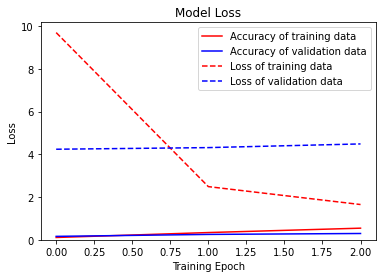

In [48]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()